In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
def leadlag_correlation(a,b, n=None):  
    '''Function to take two arrays `a` and `b` and do pearson correlation with then at 
    between `-n` and `n` steps of lead-lag.
    args:
        a: 1D array of number type
        b: array of same type and size as a
        n: maximum amplitude of lead-lag offset. Default is half length of a.
    returns:
        coef: the correlation coefficients at different lead lag steps
        p_val: the p-value associated with each correlation coeffficient'''
    
    if n is None:
        n = a.shape[0]//2
        
    cp = [scipy.stats.pearsonr(a[max(-i,0):min(len(a)-i,len(a))], b[max(i,0):min(len(b)+i,len(b))]) 
                     for i in range(-n,n,1)]
    
    coef = [c[0] for c in cp]
    p_val = [p[1] for p in cp]
    return coef, p_val

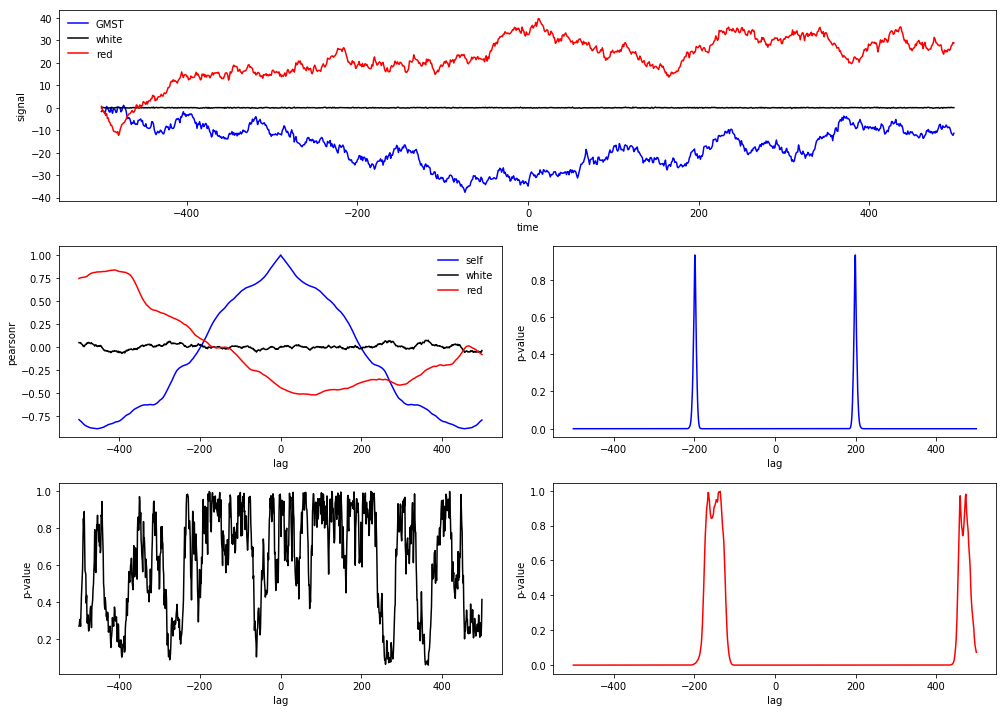

In [6]:
d=1000

gmst = np.random.normal(0,1,d).cumsum() + np.random.normal(0,0.3,d) # assume this to be GMST
w = np.random.normal(0,0.1,d) # some white noise
r = np.random.normal(0,1,d).cumsum()  # some red noise

gg = leadlag_correlation(gmst,gmst) # get lead-lag correlations between gmst and self along with p-values
gw = leadlag_correlation(gmst,w) # same but between gmst and white noise signal
gr = leadlag_correlation(gmst, r) # same but between gmst and red noise signal

x = np.arange(-gmst.shape[0]//2,gmst.shape[0]//2,1) # lead lag value to plot with

# plot the signals generated
plt.figure(figsize=(14,10))
plt.subplot(311)
plt.plot(x,gmst, label='GMST', color='b')
plt.plot(x,w, label='white', color='k')
plt.plot(x,r, label='red', color='r')
plt.legend(loc='best', framealpha=0)
plt.ylabel('signal')
plt.xlabel('time')

#plot the pearsonr correlation coefficients
plt.subplot(323)
plt.plot(x,gg[0], label='self', color='b')
plt.plot(x,gw[0], label='white', color='k')
plt.plot(x,gr[0], label='red', color='r')
plt.legend(loc='best', framealpha=0)
plt.ylabel('pearsonr')
plt.xlabel('lag')

# plot the p-values for each lead-lag correlation
plotnum=4
gs = [gg, gw, gr]
lab = ['self', 'white', 'red']
col = ['b','k','r']
for i in range(3):
    plt.subplot(320+plotnum)
    plt.ylabel('p-value')
    plt.xlabel('lag')
    plt.plot(x, gs[i][1], label=lab[i], color=col[i])
    plotnum+=1
plt.tight_layout()
plt.show()

In [178]:
print('correlaton between GMST and ___ : mean corr coeff : p-value mean, std')
for i in range(3):
    print(lab[i],':',np.mean(np.abs(np.array(gs[i][0]))),':',np.mean(gs[i][1]), ',', np.std(gs[i][1]))


correlaton between GMST and ___ : mean corr coeff : p-value mean, std
self : 0.7835972815658927 : 9.08413565994421e-25 , 1.8342137823685523e-23
white : 0.01853794646254142 : 0.6332406002352994 , 0.21671159240851653
red : 0.4675578226452589 : 0.017514226783422557 , 0.10223006214709021


Having repeated this experiment a few times I realise there is a big danger of comparing two singals that could just be red noise. Doing a lead-lag correlation correlation to infer that they might be linked is also very dangerous. I thought I might get different results if I repeated this with a higher value of my variable `d` which dictates how many points I draw in the GMST(stand in) and noise samples, but having tested up to `d=100,000` I still find the same problem.

I wonder if this is coming from the fact that the red noises are generated in the same way by sampling from the same distribution?